# Day 3 - Afternoon

## Examples

Now that we have went over the basics of what's going on under the hood of a DFT code. Let's see these ideas occur in action!

We are going to look into the electronic structure of a **metal** and **insulator**.

**Question:** How does the electronic structure differ between a metal and insulator?

The two materials that we will investigate are
    
- Aluminum (Al)
- Table salt (NaCl)

In [1]:
using DFTK
using Plots

### Aluminium (Al)

#### Crystal structure

<img src="../structure/cu.png" alt="drawing" width="300" align="left"/>

In [60]:
# crystal structure of copper (face-centerd cubic)
convert2bohr = x -> x/0.53           # in-line function
a = b = c = convert2bohr(2.856);     # lattice parameters 
positions = [[0.0, 0.0, 0.0], 
             [0.0, 0.5, 0.5], 
             [0.5, 0.0, 0.5], 
             [0.5, 0.5, 0.0]];

In [61]:
lattice = [[a 0 0]; 
           [0 b 0]; 
           [0 0 c]]

3×3 Array{Float64,2}:
 5.38868  0.0      0.0
 0.0      5.38868  0.0
 0.0      0.0      5.38868

In [62]:
Al = ElementPsp(:Al, psp=load_psp(:Al, functional="pbe"))
atoms = [Al => positions]

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(13, :Al, PspHgh(3, 0.45, [-7.55476126, 0.0, 0.0, 0.0], 1, [0.48743529, 0.56218949], [[6.95993832 -1.88883584; -1.88883584 2.43847659], [1.86529857]], "hgh/pbe/al-q3.hgh", "Al GTH-PBE-q3")) => [[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]]

In [63]:
model = model_PBE(lattice, atoms, temperature=0.01, smearing=DFTK.Smearing.FermiDirac());

In [64]:
Ecut = 20 # Ha
kgrid = [20, 20, 20];
@time basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println("n_electrons :      $(basis.model.n_electrons)")

 22.717486 seconds (223.37 k allocations: 221.452 MiB, 0.19% gc time)
n_electrons :      12


In [65]:
@time scfres = self_consistent_field(basis, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -6.955666639154         NaN   2.87e-01    2.0 
  2   -6.956851715456   -1.19e-03   8.30e-02    1.0 
  3   -6.957291226939   -4.40e-04   3.86e-03    2.1 
  4   -6.957327647043   -3.64e-05   5.37e-04    3.3 
  5   -6.957327753331   -1.06e-07   9.44e-05    3.2 
 92.190771 seconds (6.95 M allocations: 7.280 GiB, 1.30% gc time)


In [66]:
scfres.energies

Energy breakdown:
    Kinetic             7.3213227 
    AtomicLocal         4.0572636 
    AtomicNonlocal      3.5204551 
    Ewald               -15.3149805
    PspCorrection       -2.1550990
    Hartree             0.1101709 
    Xc                  -4.4885452
    Entropy             -0.0079154

    total               -6.957327753331


In [68]:
hcat(scfres.occupation...)

13×220 Array{Float64,2}:
 2.0          2.0          2.0          …  2.0          2.0
 2.0          2.0          2.0             2.0          2.0
 2.0          2.0          2.0             2.0          2.0
 2.0          2.0          2.0             2.0          2.0
 1.99998      1.99997      1.99996         2.0          2.0
 1.99998      1.99997      1.99996      …  2.0          2.0
 1.99998      1.99628      1.38894         2.0          2.0
 8.92333e-9   3.48688e-8   3.53243e-7      2.0          2.0
 8.92333e-9   3.48687e-8   3.53242e-7      7.87375e-27  1.16588e-28
 8.92329e-9   6.40419e-9   3.29101e-9      1.95624e-27  1.16588e-28
 2.37732e-22  3.99933e-22  1.77475e-21  …  1.91931e-27  1.12573e-28
 2.10501e-22  2.62509e-22  1.65518e-21     3.86507e-29  2.98524e-29
 1.90443e-22  1.24187e-22  1.45641e-22     3.52858e-29  2.98523e-29

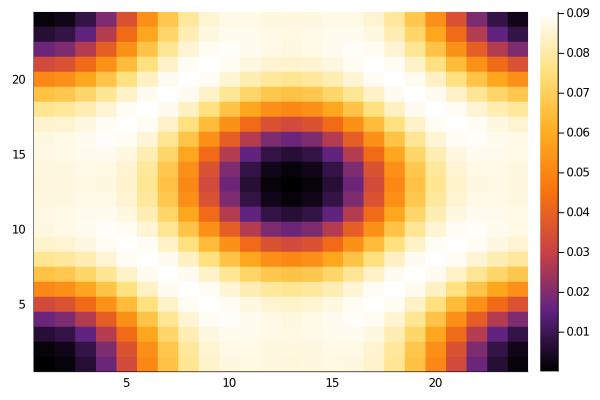

In [76]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:05


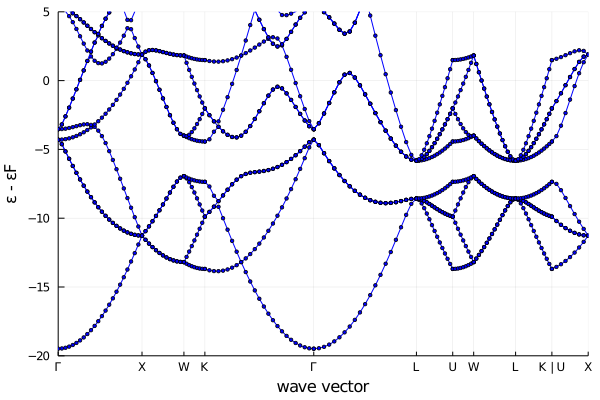

In [44]:
n_bands = 12
al_bands = plot_bandstructure(scfres, n_bands=n_bands, kline_density=10)
plot!(al_bands, ylims=(-20, 5), ylabel="ε - εF")

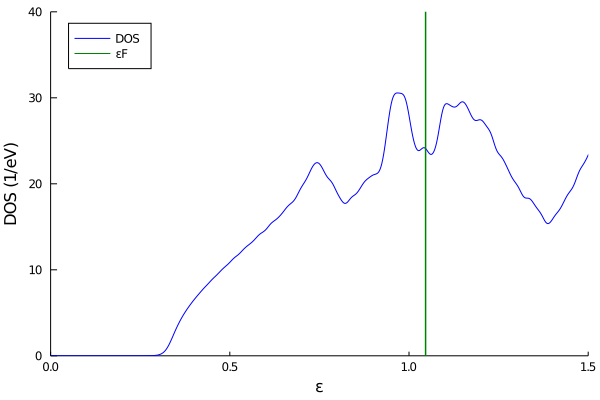

In [47]:
al_dos = plot_dos(scfres)
plot!(al_dos, ylabel="DOS (1/eV)", xlabel="ε", legend = :topleft, grid=false, xlims=(0.0, 1.5), ylims=(0, 40))

### Table Salt (NaCl)

#### Crystal structure
<img src="../structure/nacl.png" alt="drawing" width="300" align="left"/>

In [77]:
# crystal structure of copper (face-centerd cubic)
a = b = c = convert2bohr(5.69169);     # lattice parameters
Na_positions = [[0, 0, 0], [0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.0, 0.5], [0.0, 0.5, 0.0]];

In [78]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 10.739   0.0     0.0
  0.0    10.739   0.0
  0.0     0.0    10.739

In [79]:
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="pbe"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="pbe"))
atoms = [Na => Na_positions, Cl => Cl_positions];

In [80]:
model = model_PBE(lattice, atoms, temperature=0.01);

In [81]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println()
println("n_electrons :      $(basis.model.n_electrons)")
println()


n_electrons :      64



In [82]:
@time scfres = self_consistent_field(basis, n_bands = 44, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -154.1263251053         NaN   9.09e+00    5.2 
  2   -210.5705633202   -5.64e+01   2.32e+00    4.2 
  3   -215.5448880573   -4.97e+00   7.64e-01    7.7 
  4   -215.7384281790   -1.94e-01   1.94e-01    4.9 
  5   -215.7655304735   -2.71e-02   6.21e-02    2.6 
  6   -215.7658302203   -3.00e-04   1.54e-02    1.0 
  7   -215.7660366966   -2.06e-04   3.02e-03    4.0 
  8   -215.7660458153   -9.12e-06   1.18e-03    5.2 
  9   -215.7660471252   -1.31e-06   1.38e-04    3.6 
 10   -215.7660471784   -5.32e-08   8.65e-05    6.6 
178.032544 seconds (5.52 M allocations: 22.122 GiB, 1.48% gc time)


In [83]:
scfres.energies

Energy breakdown:
    Kinetic             93.0649276
    AtomicLocal         -223.2016676
    AtomicNonlocal      27.5285273
    Ewald               -136.5743247
    PspCorrection       0.6425560 
    Hartree             57.1613946
    Xc                  -34.3874444
    Entropy             -0.0000159

    total               -215.766047178395


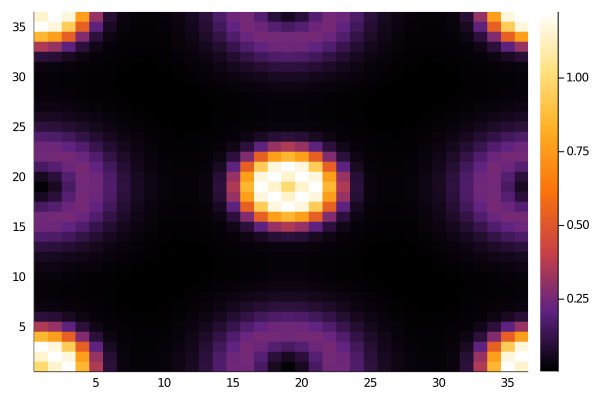

In [84]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:42


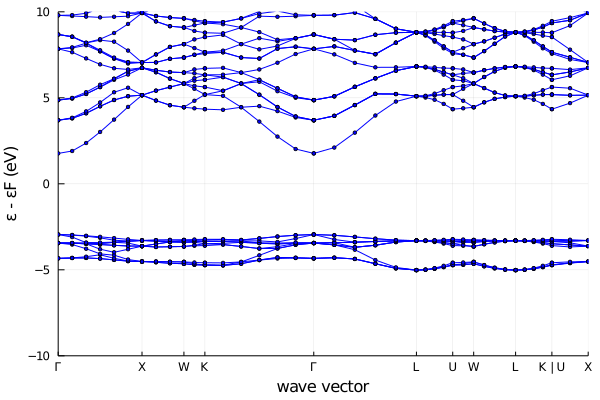

In [85]:
nacl_bands = plot_bandstructure(scfres, kline_density=5)
plot!(nacl_bands, ylabel="ε - εF (eV)", ylims=(-10, 10))

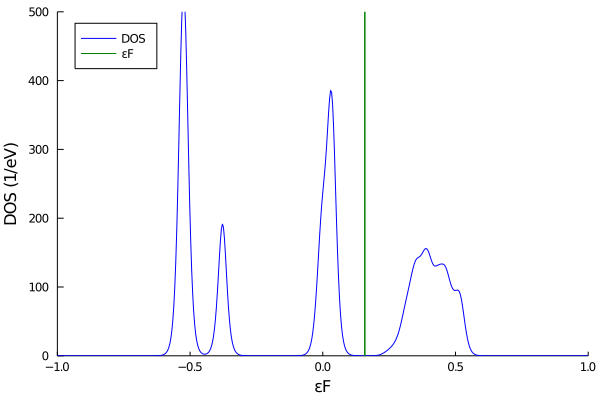

In [86]:
nacl_dos = plot_dos(scfres)
plot!(nacl_dos, ylabel="DOS (1/eV)", xlabel="εF", legend = :topleft, grid=false, xlims=(-1, 1), ylims=(0, 500))

# Compare & Contrast

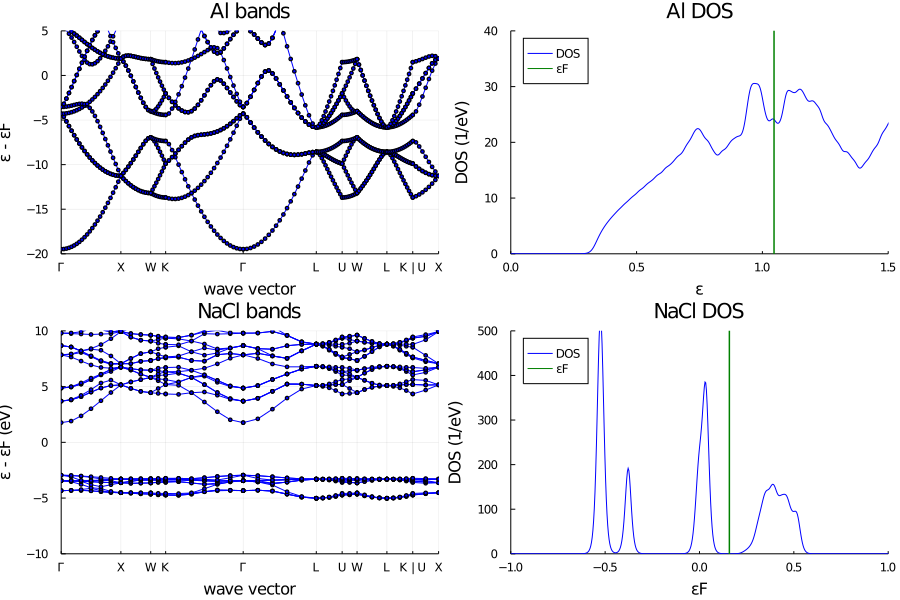

In [87]:
plot(al_bands, al_dos, nacl_bands, nacl_dos, layout = 4, size=(900, 600), title=["Al bands" "Al DOS" "NaCl bands" "NaCl DOS"])